In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.preprocessing import StandardScaler 

# The iris dataset
iris = datasets.load_iris()

In [3]:
X = iris.data

In [4]:
# Add a large number of noisy (not correlated to the target) data 

# Select random seed
np.random.seed(0)

E = np.random.uniform(0, 1, size=(len(iris.data), 50))

# Add the noisy data to the informative features
X = np.hstack((iris.data, E))

# normalize
scaler = StandardScaler()
X= scaler.fit_transform(X)

X.shape

(150, 54)

In [5]:
from sklearn import linear_model, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import scipy as sp
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis


# Init classifier
classifiers = [linear_model.LogisticRegression(solver='lbfgs',multi_class='multinomial'),svm.SVC(kernel='linear'), KNeighborsClassifier(), QuadraticDiscriminantAnalysis(), LinearDiscriminantAnalysis(solver="lsqr")]
names = ["Logistic Regression", "K Nearest Neighbors", "Support Vector Machines", "Quadratic Discrim Analysis", "Linear Discrim Analysis"]

# Split data -> 2/3 for learning & 1/3 for validation
X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.75, random_state=0)

for clf,name in zip(classifiers,names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) # predict the label of X_test from X_train and y_train
    acc = accuracy_score(y_test, y_pred) # Compute the overall accuracy
    print('Misclassification error rate for {1}: \t {0:.2f}'.format(1-acc,name)) # \t means "tabular" space, and {0:.2f} 
                                                           # means we print only two first decimal

Misclassification error rate for Logistic Regression: 	 0.35
Misclassification error rate for K Nearest Neighbors: 	 0.31
Misclassification error rate for Support Vector Machines: 	 0.32
Misclassification error rate for Quadratic Discrim Analysis: 	 0.46
Misclassification error rate for Linear Discrim Analysis: 	 0.77


/home/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


<IPython.core.display.Javascript object>


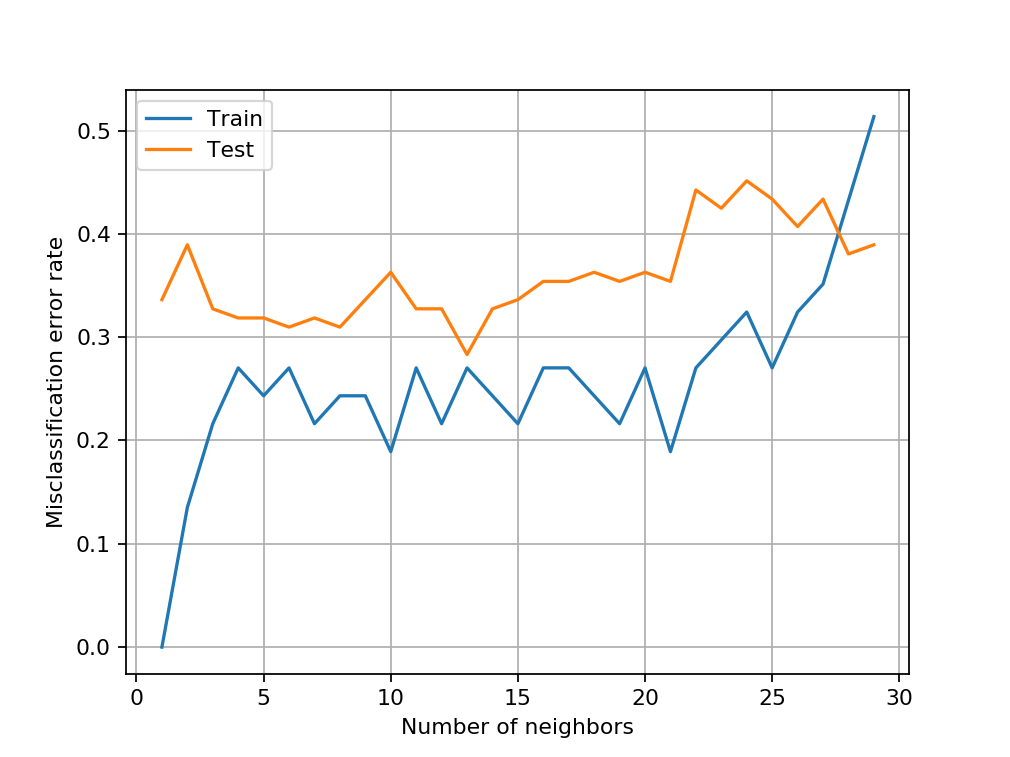

In [6]:
neighbors = sp.arange(1,30)
errors_train, errors_validation = [], []
for n_ in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_train)
    errors_train.append(accuracy_score(y_train, y_pred))
    
    y_pred = knn.predict(X_test)
    errors_validation.append(accuracy_score(y_test, y_pred))
    
plt.plot(neighbors,1- np.asarray(errors_train))
plt.plot(neighbors,1- np.asarray(errors_validation))
plt.legend(["Train", "Test"])
plt.xlabel("Number of neighbors")
plt.ylabel("Misclassification error rate")
plt.grid()

## Regularization and Variable selection

In [7]:
# LogisticRegression with L1  (lasso style) penalty

from sklearn.linear_model import LogisticRegressionCV

clf= LogisticRegressionCV( cv=10, penalty='l1', solver='liblinear', multi_class='auto' )
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test) # predict the label of X_test from X_train and y_train
acc = accuracy_score(y_test, y_pred) # Compute the overall accuracy
print('Accuracy for penalized Log Reg: \t {0:.2f}\n'.format(acc,name)) 
print('Misclassification error rate for penalized Log Reg: \t {0:.2f}\n'.format(1-acc,name)) 

Accuracy for penalized Log Reg: 	 0.90

Misclassification error rate for penalized Log Reg: 	 0.10



In [8]:
# Display the LR coefficients

# for each of 3 vectors: first four coeffs corresponds to iris variable, others to noise variables
print(clf.coef_)

[[ 0.          0.43147764 -1.89696576  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
 

### Questions:
- Does the methods without regularization work well on this high dimensional and noisy data?
- Does the regularized (lasso penalty) works well?
- Does the lasso penaly suceed in recovering the significant features?